In [163]:
from keras.layers import Embedding,Dense,LSTM,Dropout
import pandas as pd
from keras.preprocessing.text import one_hot,hashing_trick,Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [164]:
df = pd.read_csv("train_set.csv",delimiter=",",encoding='latin-1')
data = df.as_matrix()
num_class = 12

In [165]:
X = data[:,1]

In [166]:
Y = data[:,0]

In [167]:
tokenizer = Tokenizer()

In [168]:
tokenizer.fit_on_texts(X)

In [169]:
X = tokenizer.texts_to_sequences(X)

In [170]:
X = pad_sequences(X,padding='post')

In [171]:
print(tokenizer.num_words)

None


In [172]:
label = LabelEncoder()
Y = label.fit_transform(Y)
Y = to_categorical(Y)

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.0)

In [175]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((23615, 21), (0, 21), (23615, 12), (0, 12))

In [176]:
#####Preprocessing Work Completed###############

In [184]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [193]:
model = Sequential()

In [194]:
model.add(Embedding(len(tokenizer.word_index)+1,100,input_length=X.shape[1]))


In [195]:
model.add(LSTM(64))
model.add(Dropout(0.3))

In [196]:
model.add(Dense(num_class,activation='softmax'))

In [197]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [198]:
model.fit(X_train,Y_train,batch_size=24,epochs=20,validation_split=0.2,shuffle=True)

Train on 18892 samples, validate on 4723 samples
Epoch 1/20
18892/18892 [==============================] - 39s 2ms/step - loss: 1.1166 - acc: 0.6113 - val_loss: 0.4778 - val_acc: 0.8575
Epoch 2/20
18892/18892 [==============================] - 38s 2ms/step - loss: 0.3532 - acc: 0.8996 - val_loss: 0.3507 - val_acc: 0.8893
Epoch 3/20
18892/18892 [==============================] - 34s 2ms/step - loss: 0.1748 - acc: 0.9529 - val_loss: 0.3013 - val_acc: 0.9121
Epoch 4/20
18892/18892 [==============================] - 34s 2ms/step - loss: 0.1082 - acc: 0.9729 - val_loss: 0.3073 - val_acc: 0.9210
Epoch 5/20
18892/18892 [==============================] - 35s 2ms/step - loss: 0.0702 - acc: 0.9830 - val_loss: 0.3369 - val_acc: 0.9261
Epoch 6/20
18892/18892 [==============================] - 36s 2ms/step - loss: 0.0536 - acc: 0.9864 - val_loss: 0.3316 - val_acc: 0.9297
Epoch 7/20
18892/18892 [==============================] - 41s 2ms/step - loss: 0.0477 - acc: 0.9871 - val_loss: 0.3191 - val_acc:

In [200]:
history = _

In [201]:
import matplotlib.pyplot as plt

In [202]:
plt.plot(history.history['acc'])

In [203]:
plt.plot(history.history['val_acc'])

In [204]:
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='lower right')

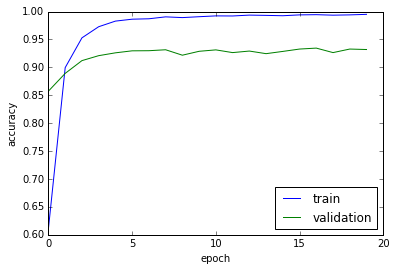

In [205]:
plt.show()

4723/4723 [==============================] - 1s 198us/step


[0.44975030444611336, 0.9176370951550354]